Study the [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and [Sparse Matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) classes. For the messages dataset build classifier. Plot [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and output [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). You can use this example to read messages.

Consider the following decision rule:

	def get_class(spam_prob):

		if spam_prob < 0.5:

			return "legit"

		else:

			return "spam"
		
Try to modify it such that no one legit message will be classified as spam but accuracy will be as high as possible

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Naive_Bayes_read_messages_as_sparse_matrix as read_messages
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Data preparation

In [3]:
X_train, X_test, y_train, y_test = read_messages.get_data()

In [4]:
def get_class(spam_prob, decision):
    if spam_prob < decision:
        return "legit"
    else:
        return "spam"

def get_boolclass(y):
    if y == "spam":
        return 1
    else:
        return 0

# Naive Bayes

In [5]:
def naive_bayes(X_train, y_train, X_test, alpha=1, decision=0.5):
    clf = MultinomialNB(alpha=alpha, fit_prior=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    y_cpred = list(map(lambda y: get_class(y, decision), y_pred))
    y_bpred = list(map(lambda y: get_boolclass(y), y_cpred))
    return clf, y_pred, y_cpred, y_bpred


# Results

## without decision rule, with default parameters

--- Without get_class function ---
FPR = [0.         0.01932367 0.01932367 0.02415459 0.02415459 0.02898551
 0.02898551 0.03381643 0.03381643 0.03864734 0.03864734 0.05797101
 0.05797101 0.11594203 0.11594203 0.1352657  0.1352657  0.14009662
 0.14009662 0.17391304 0.17391304 0.1884058  0.1884058  0.29951691
 0.29951691 0.30434783 0.30434783 0.85024155 1.        ]
TPR = [0.         0.84313725 0.86928105 0.86928105 0.87581699 0.87581699
 0.89542484 0.89542484 0.92156863 0.92156863 0.93464052 0.93464052
 0.94771242 0.94771242 0.95424837 0.95424837 0.96078431 0.96078431
 0.96732026 0.96732026 0.97385621 0.97385621 0.9869281  0.9869281
 0.99346405 0.99346405 1.         1.         1.        ]
AUC = 0.9783713807584224


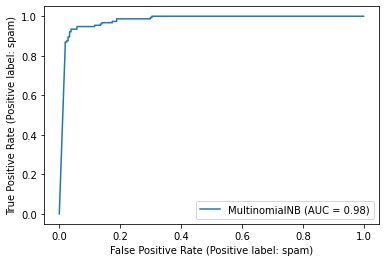

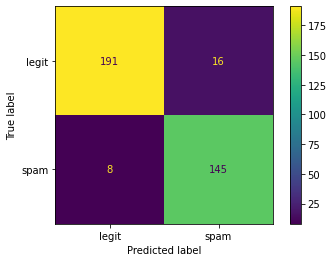

In [6]:
clf, y_pred, y_cpred, y_bpred = naive_bayes(X_train, y_train, X_test)

print("--- Without get_class function ---")
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='spam')
auc = roc_auc_score(y_test, y_pred)

print(f"FPR = {fpr}")
print(f"TPR = {tpr}")
print(f"AUC = {auc}")

plot_roc_curve(clf, X_test, y_test) 
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

## with decision rule, with default parameters


--- With get_class function ---
FPR = [0.         0.07729469 1.        ]
TPR = [0.         0.94771242 1.        ]
AUC = 0.9352088661551577


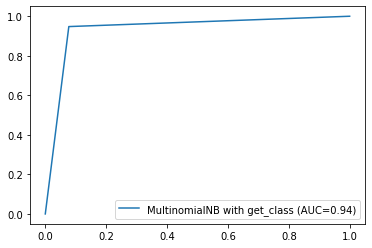

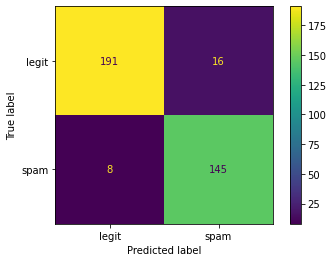

In [7]:
print("\n--- With get_class function ---")

fpr, tpr, thresholds = roc_curve(y_test, y_bpred, pos_label='spam')
auc = roc_auc_score(y_test, y_bpred)

print(f"FPR = {fpr}")
print(f"TPR = {tpr}")
print(f"AUC = {auc}")

plt.plot(fpr,tpr,label="MultinomialNB with get_class (AUC={:.2f})".format(auc))
plt.legend(loc=4)

cm = confusion_matrix(y_test, y_cpred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()


## with decision rule, with parameters tuning

In [8]:
dFP = dict()
for alpha in np.arange(0, 1, 0.0001):
    for decision in np.arange(0.2, 0.8, 0.0001):
        clf, y_pred, y_cpred, y_bpred = naive_bayes(X_train, y_train, X_test, alpha, decision)
        cm = confusion_matrix(y_test, y_cpred, labels=clf.classes_)
        if cm[1][0] < 8:
            dFP[roc_auc_score(y_test, y_bpred)] = (alpha, decision)
dFP

{}

## best approach

Approach with parameters:
	decision coefficient = 0.3
	alpha = 0.001


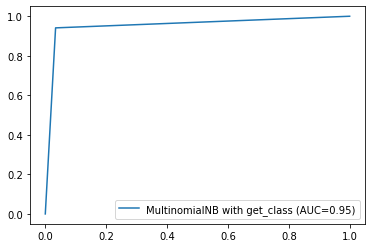

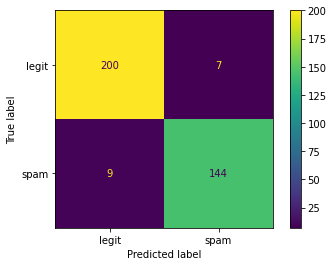

In [9]:
dFP = dict()
alpha=0.001
decision=0.3
clf, y_pred, y_cpred, y_bpred = naive_bayes(X_train, y_train, X_test, alpha, decision)
cm = confusion_matrix(y_test, y_cpred, labels=clf.classes_)

fpr, tpr, thresholds = roc_curve(y_test, y_bpred, pos_label='spam')
auc = roc_auc_score(y_test, y_bpred)

print(f"Approach with parameters:")
print(f"\tdecision coefficient = {decision}\n\talpha = {alpha}")
plt.plot(fpr,tpr,label="MultinomialNB with get_class (AUC={:.2f})".format(auc))
plt.legend(loc=4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()